In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("google-play-store.csv")

In [3]:
df.head()

,app_id,title,reviews,ratings,min_installs,score,offers_iap,ad_supported,released,ratings_per_day,genre,genre_id,price,rating_one_star,rating_two_star,rating_three_star,rating_four_star,rating_five_star
0,com.prettyteengames.royal.princess.wedding.mak...,Royal Princess Wedding Makeover and Dress Up,375.0,1023.0,100000,4.179863,True,True,2017-12-20,3,Casual,GAME_CASUAL,0.0,115,31,98,90,689
1,com.MayGreenStudio.dressup,Momo's Dressup,13492.0,25974.0,1000000,4.711096,False,True,2017-03-07,42,Casual,GAME_CASUAL,0.0,673,213,806,2561,21721
2,air.theflash.f2game.PrettyGirl23,Princess Pretty Girl,1974.0,4610.0,500000,4.295445,False,True,2015-01-18,3,Casual,GAME_CASUAL,0.0,382,206,287,528,3207
3,air.com.dressupone.animeschooluniforms,Anime School Uniforms,2586.0,6081.0,500000,4.209505,False,True,2013-08-20,3,Casual,GAME_CASUAL,0.0,628,193,524,668,4068
4,air.theflash.f2game.PrettyGirl7,Wedding Pretty girl,1409.0,3728.0,500000,4.195011,False,True,2014-09-01,2,Casual,GAME_CASUAL,0.0,358,185,300,414,2471


In [4]:
df.shape

(62694, 18)

In [5]:
# Q1: how many apps are there in dataset?



In [6]:
df["app_id"].value_counts()

com.prettyteengames.royal.princess.wedding.makeover    1
com.ankama.cosmobot                                    1
mosa.apps.khalid_alrashid                              1
com.dan.kaftan.mathgame                                1
ink.hue.pme                                            1
                                                      ..
com.jpbrothers.android.pictail.sub4                    1
gallery.gallerydownload.gallerylocker                  1
com.insfull.bigprofilepicture                          1
com.hhyu.neuron                                        1
com.ninepixel.whitehorseprincessandroid                1
Name: app_id, Length: 62694, dtype: int64

In [7]:
df["app_id"].nunique()

62694

In [8]:
df["app_id"].duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
62689    False
62690    False
62691    False
62692    False
62693    False
Name: app_id, Length: 62694, dtype: bool

In [9]:
df["app_id"].duplicated().sum()

0

In [10]:
df[df["app_id"].duplicated()]

,app_id,title,reviews,ratings,min_installs,score,offers_iap,ad_supported,released,ratings_per_day,genre,genre_id,price,rating_one_star,rating_two_star,rating_three_star,rating_four_star,rating_five_star


In [11]:
# Q2: What are the top five genres of apps by count?


In [12]:
df.groupby("genre" , as_index=False).size().sort_values("size", ascending=False).head(5)

,genre,size
15,Education,6673
42,Tools,6192
17,Entertainment,3395
7,Books & Reference,3052
24,Lifestyle,2797


In [13]:
df["genre"].value_counts().head(5)

Education            6673
Tools                6192
Entertainment        3395
Books & Reference    3052
Lifestyle            2797
Name: genre, dtype: int64

In [14]:
for name, group in df.groupby("genre"):
    print(name)
    print("###################")
    print(group)
    break

Action
###################
                                                  app_id  \
62                                         com.io.goozio   
64                           com.globalfun.vilgax.google   
65                     com.globalfun.ben10omniverse.free   
66                          com.nazara.chotabheemthehero   
134                             com.imayi.jurassicrescue   
...                                                  ...   
62185             com.motionartgames.medievalwarfighting   
62404                               com.playmobil.kaboom   
62406                                   com.amuzo.plytat   
62475  com.threed.flying.robot.car.transformation.rus...   
62627                            com.jaeyunnoh.braainsio   

                                                   title  reviews  ratings  \
62                                               gooz io   2345.0   6215.0   
64                                Ben 10: Omnitrix Power   8642.0  29946.0   
65                

In [15]:
# Q4: What is the average rating score for all apps?
# What is the average rating score for each genre?

In [16]:
df["score"].mean()

4.221623968066292

In [17]:
#df.groupby("genre")["score"].mean()
df.groupby("genre").agg({"score": "mean"})

,score
genre,
Action,4.246685
Adventure,4.263523
Arcade,4.245784
Art & Design,4.256043
Auto & Vehicles,4.067935
Beauty,3.960839
Board,4.330235
Books & Reference,4.515021
Business,3.970834


In [18]:
df.groupby("genre").agg({"score":"mean"})

,score
genre,
Action,4.246685
Adventure,4.263523
Arcade,4.245784
Art & Design,4.256043
Auto & Vehicles,4.067935
Beauty,3.960839
Board,4.330235
Books & Reference,4.515021
Business,3.970834


In [19]:
df.groupby("genre" , as_index=False).agg({"score":"mean"}).sort_values("score", ascending=False).head()

,genre,score
7,Books & Reference,4.515021
47,Word,4.494153
31,Personalization,4.476157
28,Music & Audio,4.459054
10,Casino,4.450163


In [20]:
# Q5: Visualize the output in the Q4.

In [21]:
df_Q5=df.groupby("genre").agg({"score":"mean"})

In [22]:
df_Q5.head()

,score
genre,
Action,4.246685
Adventure,4.263523
Arcade,4.245784
Art & Design,4.256043
Auto & Vehicles,4.067935


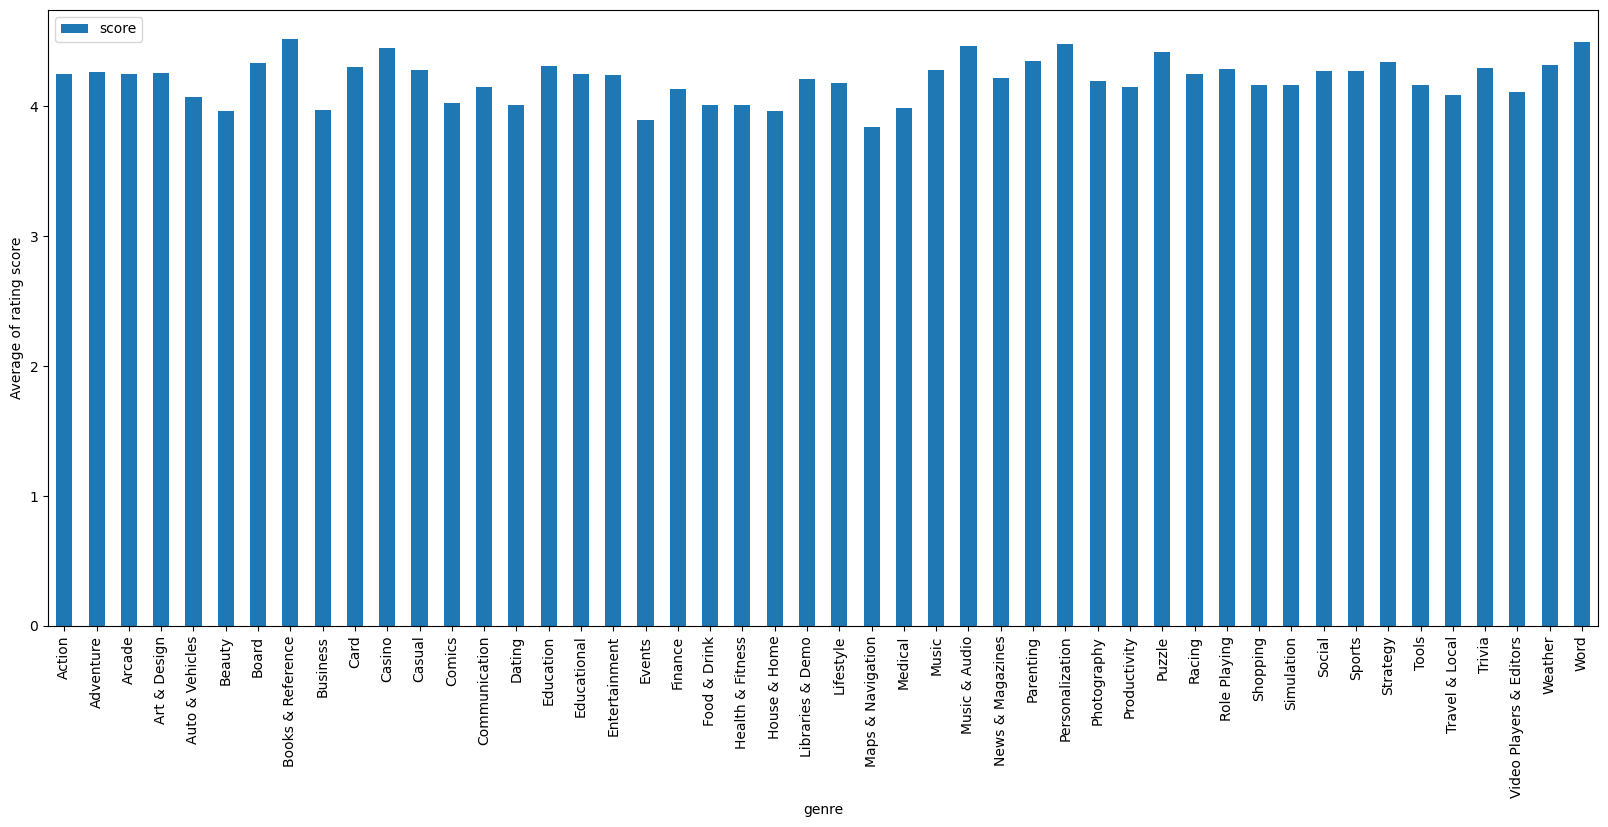

In [23]:
df_Q5.plot(kind="bar",figsize=(20,8))
plt.ylabel("Average of rating score")
plt.show()

In [24]:
# Q6: Use the same visualation above but now classify the genres into two groups. Above average, belove average.
# Show both with different colors.

In [25]:
avg_review = df["score"].mean()

In [26]:
df_Q5["score_situation"] = "Above AVG"
df_Q5.loc[df_Q5["score"] < avg_review, "score_situation"] = "Below AVG"

In [27]:
df_Q5.head()

,score,score_situation
genre,,
Action,4.246685,Above AVG
Adventure,4.263523,Above AVG
Arcade,4.245784,Above AVG
Art & Design,4.256043,Above AVG
Auto & Vehicles,4.067935,Below AVG


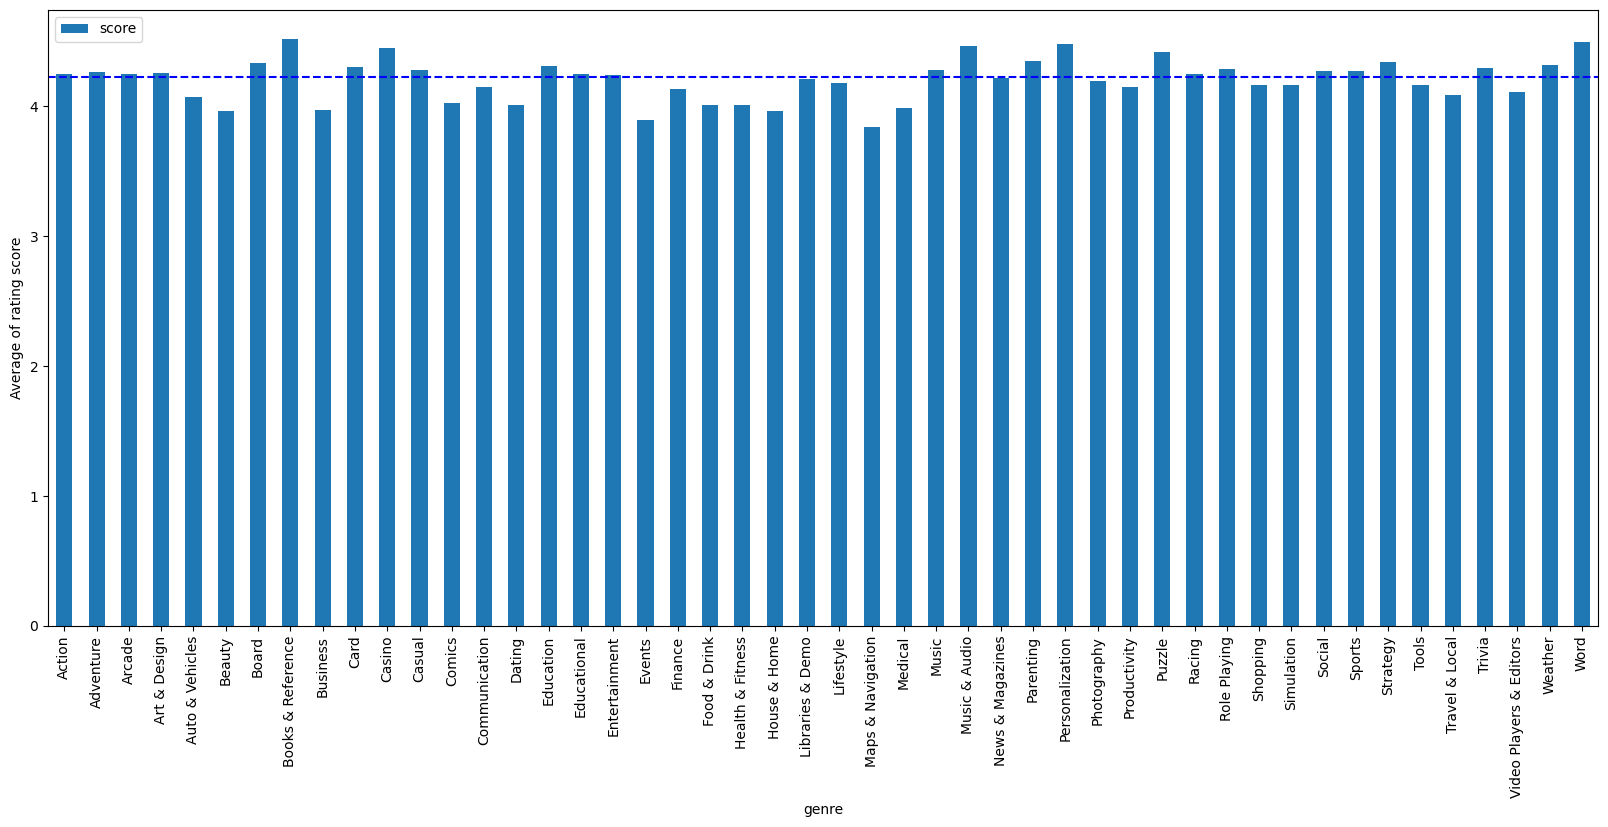

In [28]:
df_Q5.plot(kind="bar",figsize=(20,8))
plt.axhline(y=avg_review, color='b', linestyle='--', label='AVG Review')

plt.ylabel("Average of rating score")
plt.show()

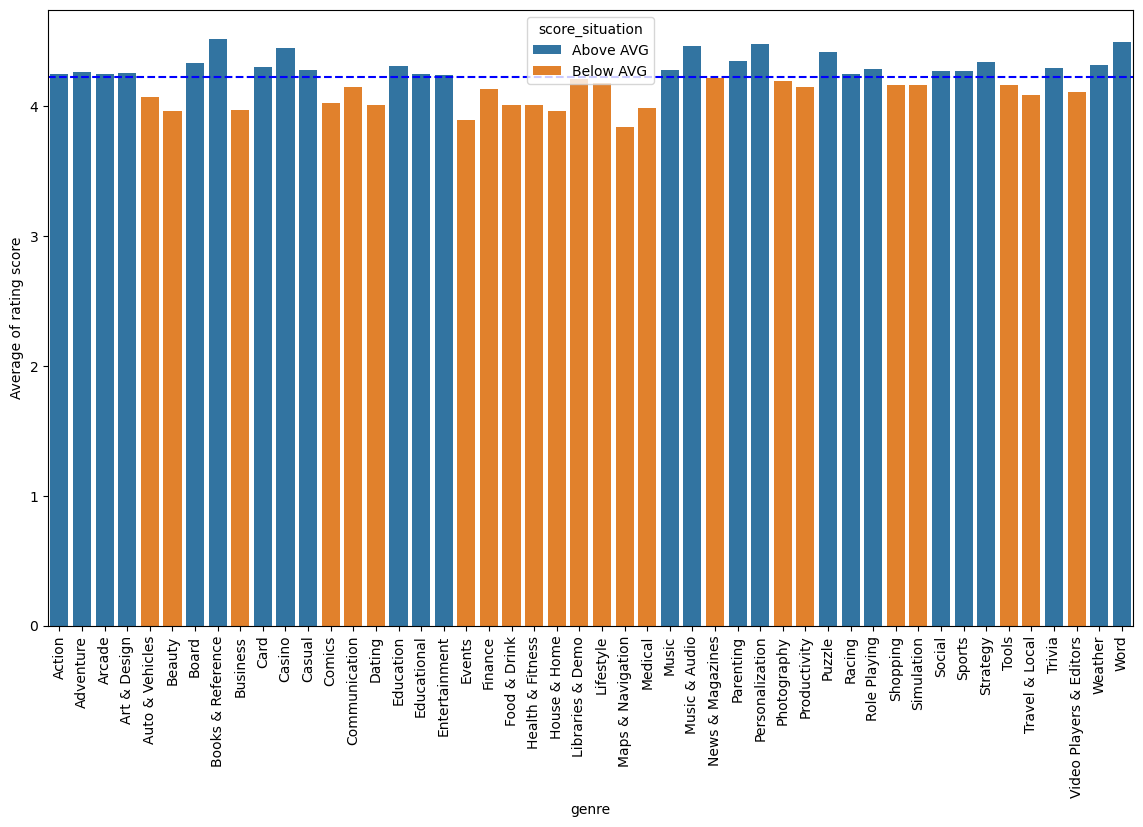

In [29]:
#df_Q5.plot(kind="bar",figsize=(20,8))
plt.figure(figsize=(14, 8))
sns.barplot(x=df_Q5.index, y=df_Q5["score"], hue=df_Q5["score_situation"])
plt.axhline(y=avg_review, color='b', linestyle='--', label='AVG Review')
plt.xticks(rotation=90)


plt.ylabel("Average of rating score")
plt.show()

In [30]:
# Visualise only the difference from the mean, not the means of all genres, and sort the results

In [31]:
df_Q5.head()

,score,score_situation
genre,,
Action,4.246685,Above AVG
Adventure,4.263523,Above AVG
Arcade,4.245784,Above AVG
Art & Design,4.256043,Above AVG
Auto & Vehicles,4.067935,Below AVG


In [32]:
df_Q5["score_diff"] = df_Q5["score"] - avg_review

In [33]:
df_Q5.sort_values("score_diff", ascending=False, inplace=True)

In [34]:
df_Q5.head()

,score,score_situation,score_diff
genre,,,
Books & Reference,4.515021,Above AVG,0.293397
Word,4.494153,Above AVG,0.272529
Personalization,4.476157,Above AVG,0.254533
Music & Audio,4.459054,Above AVG,0.237430
Casino,4.450163,Above AVG,0.228539


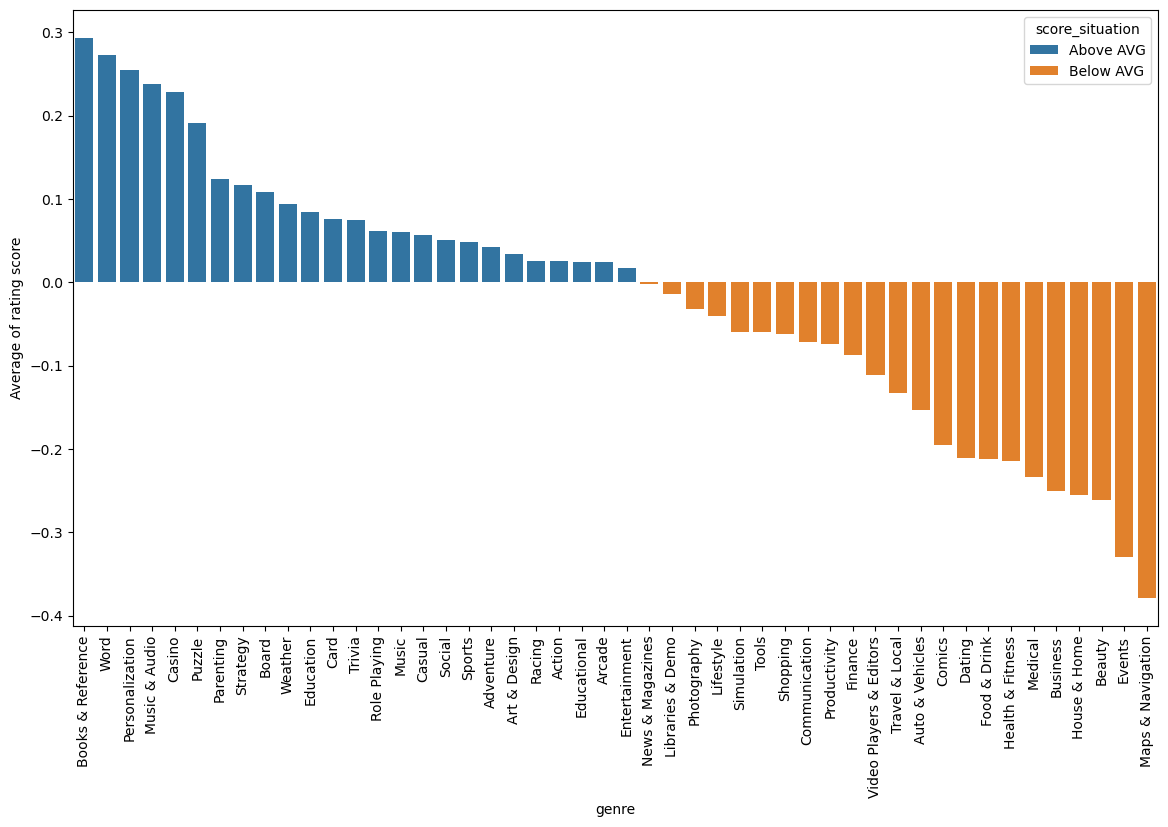

In [35]:
#df_Q5.plot(kind="bar",figsize=(20,8))
plt.figure(figsize=(14, 8))
sns.barplot(x=df_Q5.index, y=df_Q5["score_diff"], hue=df_Q5["score_situation"])
# plt.axhline(y=avg_review, color='b', linestyle='--', label='AVG Review')
plt.xticks(rotation=90)


plt.ylabel("Average of rating score")
plt.show()

In [36]:
# Q6: Which genre has the highest total number of installs?

In [37]:
df.head()

,app_id,title,reviews,ratings,min_installs,score,offers_iap,ad_supported,released,ratings_per_day,genre,genre_id,price,rating_one_star,rating_two_star,rating_three_star,rating_four_star,rating_five_star
0,com.prettyteengames.royal.princess.wedding.mak...,Royal Princess Wedding Makeover and Dress Up,375.0,1023.0,100000,4.179863,True,True,2017-12-20,3,Casual,GAME_CASUAL,0.0,115,31,98,90,689
1,com.MayGreenStudio.dressup,Momo's Dressup,13492.0,25974.0,1000000,4.711096,False,True,2017-03-07,42,Casual,GAME_CASUAL,0.0,673,213,806,2561,21721
2,air.theflash.f2game.PrettyGirl23,Princess Pretty Girl,1974.0,4610.0,500000,4.295445,False,True,2015-01-18,3,Casual,GAME_CASUAL,0.0,382,206,287,528,3207
3,air.com.dressupone.animeschooluniforms,Anime School Uniforms,2586.0,6081.0,500000,4.209505,False,True,2013-08-20,3,Casual,GAME_CASUAL,0.0,628,193,524,668,4068
4,air.theflash.f2game.PrettyGirl7,Wedding Pretty girl,1409.0,3728.0,500000,4.195011,False,True,2014-09-01,2,Casual,GAME_CASUAL,0.0,358,185,300,414,2471


In [38]:
# Solution_1

In [39]:
df_Q6 = df.groupby("genre").agg({"min_installs": "sum"})

In [40]:
df_Q6.head()

,min_installs
genre,
Action,5159334100
Adventure,971827210
Arcade,5563164090
Art & Design,281826260
Auto & Vehicles,119088810


In [41]:
max_install = df_Q6.max()[0]

In [42]:
df_Q6[df_Q6["min_installs"] == max_install]

,min_installs
genre,
Tools,19324157224


In [43]:
# Solution_2

In [44]:
df.groupby("genre").agg({"min_installs": "sum"}).sort_values("min_installs", ascending=False).head(1)

,min_installs
genre,
Tools,19324157224


In [45]:
# Q9: Provide the sum of missing values for each column
# Try to create a strategy to handle the missng values

In [46]:
df.shape

(62694, 18)

In [47]:
df.isnull().sum()

app_id                 0
title                  0
reviews               11
ratings               11
min_installs           0
score                 11
offers_iap             0
ad_supported           0
released             846
ratings_per_day        0
genre                  1
genre_id               1
price                  0
rating_one_star        0
rating_two_star        0
rating_three_star      0
rating_four_star       0
rating_five_star       0
dtype: int64

In [48]:
df.isnull().mean()

app_id               0.000000
title                0.000000
reviews              0.000175
ratings              0.000175
min_installs         0.000000
score                0.000175
offers_iap           0.000000
ad_supported         0.000000
released             0.013494
ratings_per_day      0.000000
genre                0.000016
genre_id             0.000016
price                0.000000
rating_one_star      0.000000
rating_two_star      0.000000
rating_three_star    0.000000
rating_four_star     0.000000
rating_five_star     0.000000
dtype: float64

In [49]:
df.head()

,app_id,title,reviews,ratings,min_installs,score,offers_iap,ad_supported,released,ratings_per_day,genre,genre_id,price,rating_one_star,rating_two_star,rating_three_star,rating_four_star,rating_five_star
0,com.prettyteengames.royal.princess.wedding.mak...,Royal Princess Wedding Makeover and Dress Up,375.0,1023.0,100000,4.179863,True,True,2017-12-20,3,Casual,GAME_CASUAL,0.0,115,31,98,90,689
1,com.MayGreenStudio.dressup,Momo's Dressup,13492.0,25974.0,1000000,4.711096,False,True,2017-03-07,42,Casual,GAME_CASUAL,0.0,673,213,806,2561,21721
2,air.theflash.f2game.PrettyGirl23,Princess Pretty Girl,1974.0,4610.0,500000,4.295445,False,True,2015-01-18,3,Casual,GAME_CASUAL,0.0,382,206,287,528,3207
3,air.com.dressupone.animeschooluniforms,Anime School Uniforms,2586.0,6081.0,500000,4.209505,False,True,2013-08-20,3,Casual,GAME_CASUAL,0.0,628,193,524,668,4068
4,air.theflash.f2game.PrettyGirl7,Wedding Pretty girl,1409.0,3728.0,500000,4.195011,False,True,2014-09-01,2,Casual,GAME_CASUAL,0.0,358,185,300,414,2471


In [50]:
df["reviews"].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
62689    False
62690    False
62691    False
62692    False
62693    False
Name: reviews, Length: 62694, dtype: bool

In [53]:
df[df["reviews"].isnull()]

,app_id,title,reviews,ratings,min_installs,score,offers_iap,ad_supported,released,ratings_per_day,genre,genre_id,price,rating_one_star,rating_two_star,rating_three_star,rating_four_star,rating_five_star
815,com.codigames.idle.airport.tycoon,Idle Airport Tycoon - Tourism Empire,NaN,NaN,0,NaN,False,True,NaN,0,Simulation,GAME_SIMULATION,0.0,0,0,0,0,0
3314,com.sega.revolvers8,Revolve8,NaN,NaN,0,NaN,False,False,NaN,0,Strategy,GAME_STRATEGY,0.0,0,0,0,0,0
3319,com.sega.puzzlerpg,SEGA Heroes,NaN,NaN,0,NaN,False,False,NaN,0,Role Playing,GAME_ROLE_PLAYING,0.0,0,0,0,0,0
16350,com.outfit7.mytalkingtom2,My Talking Tom 2,NaN,NaN,0,NaN,False,True,NaN,0,Casual,GAME_CASUAL,0.0,0,0,0,0,0
23755,com.ubisoft.accovenant,Assassin's Creed Rebellion,NaN,NaN,0,NaN,False,True,NaN,0,Role Playing,GAME_ROLE_PLAYING,0.0,0,0,0,0,0
23882,com.stove.epic7.google,Epic Seven,NaN,NaN,0,NaN,False,False,NaN,0,Role Playing,GAME_ROLE_PLAYING,0.0,0,0,0,0,0
26320,com.icestorm.mentors,Mentors: Turn Based RPG Strategy,NaN,NaN,0,NaN,False,True,NaN,0,Role Playing,GAME_ROLE_PLAYING,0.0,0,0,0,0,0
26368,com.ea.gp.candcwarzones,Command & Conquer: Rivals,NaN,NaN,0,NaN,False,False,NaN,0,Strategy,GAME_STRATEGY,0.0,0,0,0,0,0
52179,com.scopely.startrek,Star Trek Fleet Command,NaN,NaN,0,NaN,False,False,NaN,0,Strategy,GAME_STRATEGY,0.0,0,0,0,0,0
54101,com.enp.food2.google,Food POP : New puzzle gravity world (Food burs...,NaN,NaN,0,NaN,False,True,NaN,0,Puzzle,GAME_PUZZLE,0.0,0,0,0,0,0


In [54]:
df[df["reviews"].isnull()].isnull().sum()

app_id                0
title                 0
reviews              11
ratings              11
min_installs          0
score                11
offers_iap            0
ad_supported          0
released             11
ratings_per_day       0
genre                 0
genre_id              0
price                 0
rating_one_star       0
rating_two_star       0
rating_three_star     0
rating_four_star      0
rating_five_star      0
dtype: int64

In [56]:
df["reviews"].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
62689    False
62690    False
62691    False
62692    False
62693    False
Name: reviews, Length: 62694, dtype: bool

In [57]:
~df["reviews"].isnull()

0        True
1        True
2        True
3        True
4        True
         ... 
62689    True
62690    True
62691    True
62692    True
62693    True
Name: reviews, Length: 62694, dtype: bool

In [59]:
df_cleaned_na = df[~df["reviews"].isnull()]

In [60]:
df_cleaned_na.isnull().sum()

app_id                 0
title                  0
reviews                0
ratings                0
min_installs           0
score                  0
offers_iap             0
ad_supported           0
released             835
ratings_per_day        0
genre                  1
genre_id               1
price                  0
rating_one_star        0
rating_two_star        0
rating_three_star      0
rating_four_star       0
rating_five_star       0
dtype: int64

In [64]:
~df_cleaned_na["released"].isnull()

0        True
1        True
2        True
3        True
4        True
         ... 
62689    True
62690    True
62691    True
62692    True
62693    True
Name: released, Length: 62683, dtype: bool

In [66]:
df_cleaned_na = df_cleaned_na[~df_cleaned_na["released"].isnull()]

In [67]:
df_cleaned_na.isnull().sum()

app_id               0
title                0
reviews              0
ratings              0
min_installs         0
score                0
offers_iap           0
ad_supported         0
released             0
ratings_per_day      0
genre                1
genre_id             1
price                0
rating_one_star      0
rating_two_star      0
rating_three_star    0
rating_four_star     0
rating_five_star     0
dtype: int64

In [68]:
df_cleaned_na = df_cleaned_na[~df_cleaned_na["genre"].isnull()]

In [69]:
df_cleaned_na.isnull().sum()

app_id               0
title                0
reviews              0
ratings              0
min_installs         0
score                0
offers_iap           0
ad_supported         0
released             0
ratings_per_day      0
genre                0
genre_id             0
price                0
rating_one_star      0
rating_two_star      0
rating_three_star    0
rating_four_star     0
rating_five_star     0
dtype: int64

In [ ]:
# Alternative 2:

In [71]:
# df["reviews"].fillna(df["reviews"].mean()) 
# df["reviews"].fillna(df["reviews"].median()) 
# df["reviews"].fillna(df["reviews"].mode()) 
# df["reviews"].fillna(0) 

0          375.0
1        13492.0
2         1974.0
3         2586.0
4         1409.0
          ...   
62689     2520.0
62690     5019.0
62691     2893.0
62692     1382.0
62693     1537.0
Name: reviews, Length: 62694, dtype: float64

In [ ]:
# Alternative 3

In [73]:
df["reviews"].mean()

15298.431743853995

In [79]:
df["reviews"].median()

144.0

In [80]:
df.groupby("genre").agg({"reviews": "mean"})

,reviews
genre,
Action,73157.857290
Adventure,32836.068226
Arcade,51790.688889
Art & Design,2503.148325
Auto & Vehicles,1157.304878
Beauty,1317.699187
Board,12144.933775
Books & Reference,3052.080931
Business,1662.087229


In [76]:
for name, group in df.groupby("genre")["reviews"]:
    print(name)
    print(group)
    print("+++++")


Action
62        2345.0
64        8642.0
65       14119.0
66        5382.0
134          7.0
          ...   
62185     1239.0
62404     1301.0
62406      117.0
62475       83.0
62627    10464.0
Name: reviews, Length: 974, dtype: float64
+++++
Adventure
197       1941.0
199        309.0
628       1754.0
631      78784.0
1184       759.0
          ...   
62331    10742.0
62332        6.0
62333    20443.0
62409     2169.0
62522      489.0
Name: reviews, Length: 513, dtype: float64
+++++
Arcade
200        433.0
462       4993.0
751       9542.0
784      26927.0
1026     25403.0
          ...   
62139    84788.0
62663    78097.0
62686     9298.0
62687      339.0
62688       60.0
Name: reviews, Length: 900, dtype: float64
+++++
Art & Design
694        12.0
1032      133.0
1036       93.0
1369      854.0
1835        7.0
          ...  
62342      89.0
62343     120.0
62345      69.0
62417      54.0
62539    1364.0
Name: reviews, Length: 418, dtype: float64
+++++
Auto & Vehicles
51         19.

In [77]:
df.groupby("genre")["reviews"].transform(lambda x: x.fillna(x.median()))

0          375.0
1        13492.0
2         1974.0
3         2586.0
4         1409.0
          ...   
62689     2520.0
62690     5019.0
62691     2893.0
62692     1382.0
62693     1537.0
Name: reviews, Length: 62693, dtype: float64

In [ ]:
def myfunc():
    pass

In [ ]:
# ************************* IMPORTANT *************************
# df["reviews"] = df.groupby("genre")["reviews"].transform(lambda x: x.fillna(x.median()))

In [81]:
# Q10:
# Convert the 'price' column to a categorical column indicating 'Free' or 'Paid'.
# Try to do it first with apply with a lambda function
# and then without using any function, directly with .loc

In [84]:
df_cleaned_na.sort_values("price", ascending=False)

,app_id,title,reviews,ratings,min_installs,score,offers_iap,ad_supported,released,ratings_per_day,genre,genre_id,price,rating_one_star,rating_two_star,rating_three_star,rating_four_star,rating_five_star
11204,com.aadhk.restpos.pay,Restaurant POS (Paid),67.0,98.0,500,4.500000,False,False,2011-12-15,0,Business,BUSINESS,369.99,5,1,5,16,71
36631,com.alphabet.elite,Alpha Bet Elite Premium Tips,0.0,6.0,10,5.000000,False,False,2018-08-03,0,Sports,SPORTS,289.99,0,0,0,0,6
59060,com.javad.javadtools,JAVAD Mobile Tools,82.0,122.0,500,4.147541,False,False,2014-05-30,0,Tools,TOOLS,199.99,7,5,15,31,64
46157,com.t2techgroup.smartbettinglive,Betting Tips LIVE,12.0,16.0,10,5.000000,False,False,2018-07-08,0,Sports,SPORTS,199.99,0,0,0,0,16
36627,com.alphabet.deluxe,Alpha Bet Deluxe Premium Tips,5.0,10.0,50,4.400000,False,False,2018-06-26,0,Sports,SPORTS,194.99,1,0,1,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21613,com.selfiemaster.photoeditor,Selfie Master - Photo Editor & Camera Sticker,23.0,71.0,10000,4.366197,False,True,2018-09-18,1,Photography,PHOTOGRAPHY,0.00,6,1,3,12,49
21614,com.meitu.wheecam,SelfieCity,32895.0,137210.0,5000000,4.559908,False,False,2015-09-01,118,Photography,PHOTOGRAPHY,0.00,3695,2249,7569,23720,99977
21615,com.mobileapps.paid.learnToDraw,Learn To Draw,2927.0,8648.0,1000000,4.236124,False,True,2015-05-05,6,Education,EDUCATION,0.00,717,370,757,1114,5690
21616,com.forqan.tech.PrincessColoring,Princess Coloring Book,4508.0,12815.0,5000000,4.438861,True,True,2016-07-16,15,Education,EDUCATION,0.00,903,262,826,1141,9683


In [ ]:
# with apply

In [88]:
df_cleaned_na["price_category"] = df_cleaned_na["price"].apply(lambda x: "Free" if x == 0 else "Paid")

In [89]:
df_cleaned_na["price_category"].value_counts()

Free    57159
Paid     4688
Name: price_category, dtype: int64

In [ ]:
# with loc

In [95]:
df_cleaned_na["price_category_loc"] = "Paid"
df_cleaned_na.loc[df_cleaned_na["price"] == 0, "price_category_loc"]  = "Free"

In [96]:
df_cleaned_na["price_category_loc"].value_counts()

Free    57159
Paid     4688
Name: price_category_loc, dtype: int64